# 損失関数

損失関数はニューラルネットワークにおいて、モデルの出力と目的値との間の誤差を計測するための関数のことです。
機械学習では入力の値に対して、パラメータを調整して、求める出力の値に近づけていきます。

ここでは、よく使われる損失関数の概要を説明し、TensorFlowで使う場合のサンプルコードを紹介したいと思います。

## 事前準備

まずサンプルコードで使用するパッケージをインポートします。

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.Session()

In [46]:
#: 予測値
x_vals = tf.linspace(-1.0, 1.0, 500)

#: 目的地
target = tf.constant(0.0)

### L2 Loss (ユークリッド損失関数)

In [47]:
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

### L1 Loss (絶対損失関数)

In [48]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

### Pseudo-Huber損失関数

In [49]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(
    tf.square(delta1),
    tf.sqrt(1.0 + tf.square((target - x_vals) / delta1)) - 1.0
)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.0)
phuber2_y_vals = tf.multiply(
    tf.square(delta2),
    tf.sqrt(1.0 + tf.square((target - x_vals) / delta2)) - 1.0
)
phuber2_y_out = sess.run(phuber2_y_vals)

### ヒンジ損失関数

[tf.losses.hinge_loss](https://www.tensorflow.org/api_docs/python/tf/losses/hinge_loss)

## 各損失関数の比較

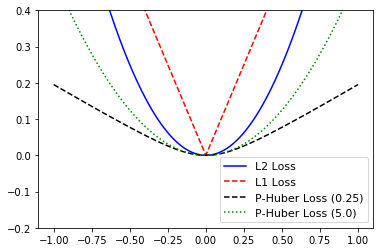

In [50]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k--', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## 参照

* [Losses - Neural Network - TensorFlow](https://www.tensorflow.org/api_guides/python/nn#Losses)
* [交差エントロピー - WikiPedia](https://ja.wikipedia.org/wiki/交差エントロピー)
* [損失関数について、ざっくりと考える - Qiita](https://qiita.com/mine820/items/f8a8c03ef1a7b390e372)
* [機械学習で抑えておくべき損失関数（回帰編） - HELLO CYBERNETICS](http://s0sem0y.hatenablog.com/entry/2017/06/19/084210)